# Explainability

In [1]:
# imports
import shap
import pandas as pd
import orga_functions as org
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# read in the data
path = org.path("03_AirQuality_normalized.csv")
df = pd.read_csv(path, sep=';' )

# Training the model

In [3]:
# load model
#with open(org.path("LinearRegression_ah_regressor.pkl"), 'rb') as fid:
#    model = pickle.load(fid)

In [4]:
target = 'ah_target'
df[target] = df.ah.shift(periods=-6)

In [5]:
# drop unknown target-rows
df.dropna(subset=[target], inplace=True)

In [6]:
# Train-/ test-split
training, test = train_test_split(df, test_size=1000, shuffle=False, random_state=1999)

In [7]:
# define the features used to train the model
features = ['co_gt', 'pt08_s1_co',"c6h6_gt","pt08_s2_nmhc", "nox_gt", "pt08_s3_nox","no2_gt", "pt08_s4_no2",
            "pt08_s5_o3", "t", "ah"]

In [8]:
# Split into input and target
X_train = training[features]
y_train = training[target]
x_test = test[features]
y_test = test[target]

# define the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# make prediction
pred_linr_y = model.predict(x_test)

# calculate mean absolute error between prediction an target
mean_absolute_error(y_test, pred_linr_y)

0.06292159304778387

# SHAP Values

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see [papers](https://github.com/slundberg/shap#citations) for details and citations).

In [9]:
# explain the model's predictions using SHAP
explainer = shap.explainers.Linear(model, X_train)
shap_values = explainer(X_train)

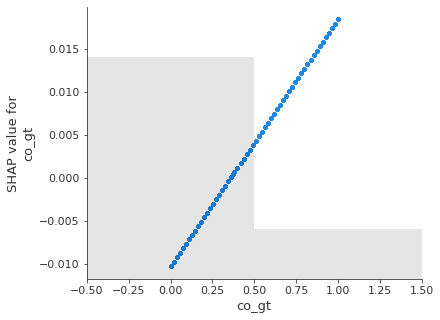

In [14]:
# visualize the model's dependence on the first feature
shap.plots.scatter(shap_values[:, 0])

>The diagram above shows the relation of the SHAP values to the value of each data point of the feature 'co_gt'. That is, one can see from this that a high value of the feature 'co_gt' increases the predicted value for 'ah_target' whereas a low value decreases the predicted value.
To see the differences between the various features, this information can also be obtained by looking at the Summary Plot (see below).

# SHAP Feature Importance

The idea behind SHAP feature importance is simple. Features with large absolute Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data.

Next, we sort the features by decreasing importance and plot them. The following figure shows the SHAP feature importance for the trained random forest model.


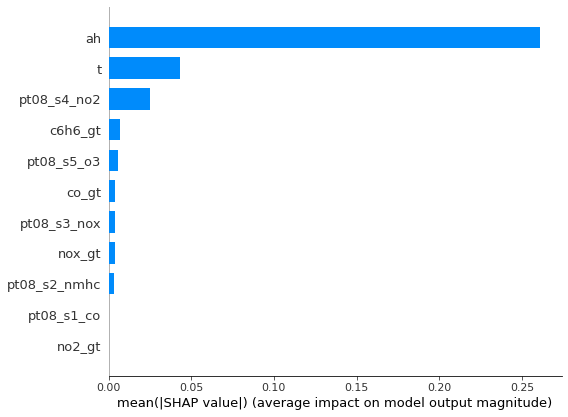

In [11]:
# Feature importance by SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")

> The above plot shows the SHAP feature importance measured as the mean absolute Shapley values.

# SHAP Summary Plot

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.

The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.


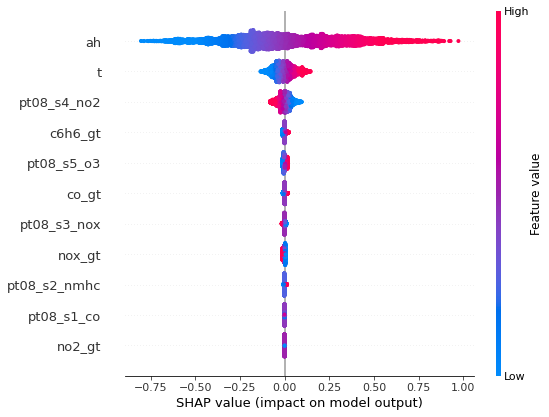

In [12]:
# SHAP Summary plot
shap.summary_plot(shap_values, X_train)

>The above plot shows the SHAP summary plot. The summary plot combines feature importance with feature effects.

>Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

>This plot is made of all the dots in the train data. It demonstrates the following information:

>- Feature importance: Variables are ranked in descending order.
>- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
>- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
>- Correlation: A previously high 'ah' value has a high and positive impact on the 'ah'-prediction. The “high” comes from the red color, and the “positive” impact is shown on the X-axis.

